In [236]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.datasets import load_boston

boston = load_boston()
from scipy.stats import iqr

In [237]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [238]:
boston.data.shape

(506, 13)

In [239]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [240]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [241]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [242]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [243]:
print(boston.target.shape)

(506,)


In [244]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [245]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Relationship between CRIM and Price')

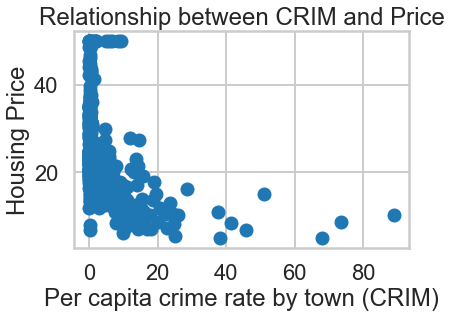

In [246]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

Exercise 1: the relationship between CRIM and Price has a non linear relationship. Something strange is that most of the points are concentrated at 20 per capita crime rate by town. Points are much scatter beyond 20 per capita crime rate by town. 

Exercise 2: For the relationship between RM and price, there exist a positively correlated linear relationship. As the average number of rooms per dwelling increase, the housing price increase. For the relationship between PTRATIO and Price, if a regression line is drawn, the slope will be negative. The strange things about the graph is that many points stack on top of each others to form vertical lines. 

Text(0.5, 1.0, 'Relationship between RM and Price')

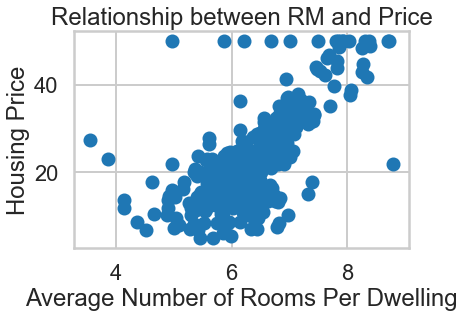

In [247]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('Average Number of Rooms Per Dwelling')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

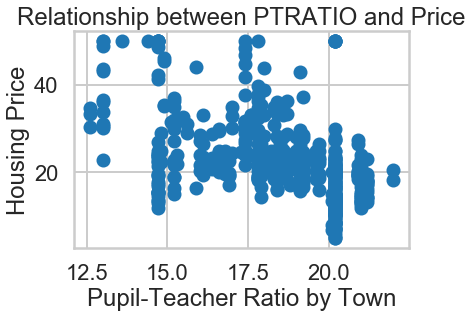

In [248]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('Housing Price')
plt.title('Relationship between PTRATIO and Price')

Exercise 3: One interesting variable to look at is the relationship between NOX. As we conclude from the graph below, the house price decrease when concentration of NOX increase. Although there might be better model to fit the graph, if regression line were drawn, it would have negative slope. This mirror the hypothesis I have. Since nitric oxides is a air pollutant, if the concentration of nitric oxides is higher, I assume the price of houses will be lower. 

Text(0.5, 1.0, 'Relationship between NOX and Price')

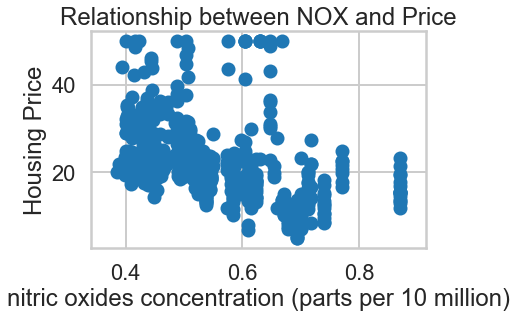

In [249]:
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel('nitric oxides concentration (parts per 10 million)')
plt.ylabel('Housing Price')
plt.title('Relationship between NOX and Price')

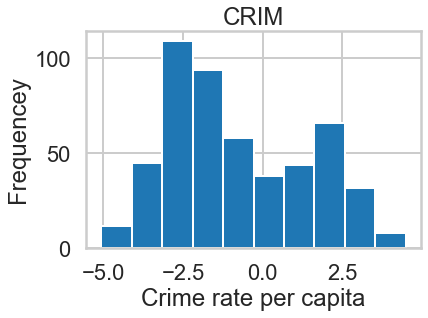

In [250]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

Exercise 1:Without taking the log, we will not be able to see the representation of other x values. Moreover, we gain more information. Before taking the log, we only see 3 bars of information, now we know more. 

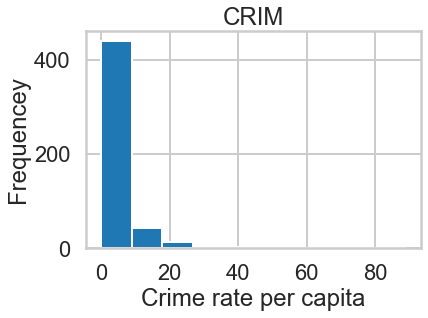

In [251]:
plt.hist((bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

Exercise 2:

In [252]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [253]:
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           2.49e-74
Time:                        15:40:52   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Exercise 1: The fitted values and the original values has a positive relationship. As fitted values increase, the original values also increase. Some fitted values points have negative values. Most of the points are concentrated at 20. 

Text(0.5, 1.0, 'Relationship between Fitted values and Original Values')

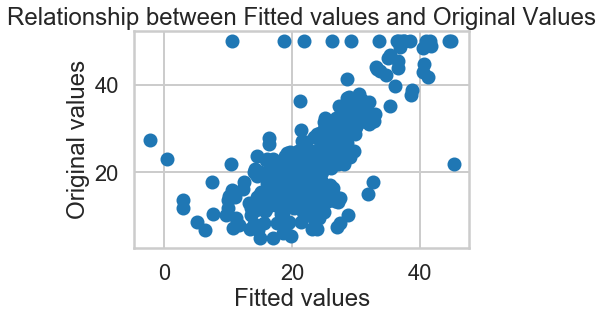

In [254]:
plt.scatter(m.fittedvalues,bos.PRICE)
plt.xlabel('Fitted values')
plt.ylabel('Original values')
plt.title('Relationship between Fitted values and Original Values')

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>

Exercise 1: To not fit an intercept term, just change the formula to y=ax instead of y=ax+b. We can do this under some situations. For example in the boston housing data, we can disregard the intercept term if the graph is about the RM and price. If RM is 0, then the price should be 0 too. In other cases such as NOX vs Price, althought there might not be NOX in air, there would still be a base price for housing. 

Exercise 2: There are 4 assumptions to meet before using regression model. That is :
1.Linearity of residuals
2.Independence of residuals
3.Normal distribution of residuals
4.Equal variance of residuals 

Exercise 3: False. We only care about whether the residual is normally distributed. Y is the dependent varible of Xs. 

In [255]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [256]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [257]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [258]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [259]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

Exercise 1: The distribution of X is normal distributed. The center of the distribution is 20. 

(array([  1.,   6.,  21.,  56., 116., 136.,  76.,  58.,  25.,  11.]),
 array([-4.28131071,  0.6141287 ,  5.50956811, 10.40500752, 15.30044693,
        20.19588634, 25.09132575, 29.98676516, 34.88220457, 39.77764398,
        44.67308339]),
 <a list of 10 Patch objects>)

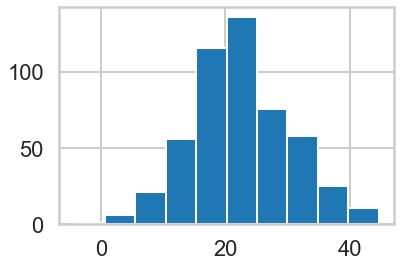

In [260]:
all_predicts=lm.predict(X)
plt.hist(all_predicts)

Exercise 2: 

Text(0.5, 1.0, 'Predicted Price VS True Price')

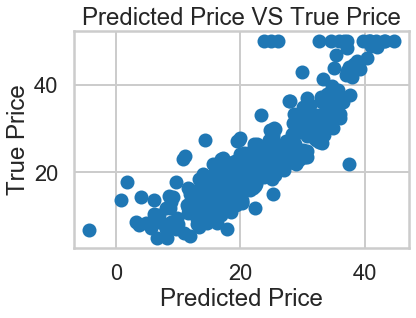

In [261]:
plt.scatter(all_predicts, bos.PRICE)
plt.xlabel('Predicted Price')
plt.ylabel('True Price')
plt.title('Predicted Price VS True Price')

Exercise 3: When doing linear regression, Statmodel provides more information on the model compare to Scikit-learn. It is also closer to R language. For Scikt-learn, it is easier to use. Especially with pipeline, I can write a systematic algorithm that transform - fit - predict the model. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

Exercise 1: The model is as following: y=-2.1572(PTRATIO)+62.3446. The mean that when PTRATIO increase by 1 unit, the price of house will decrease by 2.1572. The base price of the house with 0 PTRATIO is 62.3446. 

In [262]:
model = ols('PRICE ~ PTRATIO',bos).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           1.61e-34
Time:                        15:41:01   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

Exercise 2: The R^2 value is 0.258

Exercise 3: The F-statistic is 175.1 F-statistic is the ratio of two variances. When using with p-value, it can determine if the model statistically significant. 

Exercise 4: If we squared the t-stat of PTRATIO, we get F-stat. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [263]:
model2 = ols('PRICE ~ PTRATIO+RM+CRIM',bos).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           6.15e-98
Time:                        15:41:04   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

Exercise 1:F-stat is 245.2. It 

Exercise 2: the R^2 is 0.594. It tells us the model explained 59.4% of the data.

Exercise 3: All 3 variables are significant in prediciting the housing price since the p-value 0.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [264]:
model3 = ols('PRICE ~ PTRATIO+RM+CRIM+NOX+RAD',bos).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     161.6
Date:                Fri, 19 Jun 2020   Prob (F-statistic):          5.44e-102
Time:                        15:41:07   Log-Likelihood:                -1596.9
No. Observations:                 506   AIC:                             3206.
Df Residuals:                     500   BIC:                             3231.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9630      4.788      2.081      0.0

In [265]:
model3.compare_f_test(model2)

(15.348502949322215, 3.39501524397418e-07, 2.0)

Exercise 1: The F-ratio is higher than 1. The p-value is extremely small. This tells us model3 has a better fit than model2. Moreover, the AIC of model3 is smaller than model2 which further solidfy the conclusion that model3 is a better model than model2


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

Exercise 1:Most of the points are concentrated in the middle. Many points scatter above the points cloud. The red curvey line indicate the model is underfitted. 

Text(0.5, 1.0, 'Fitted values VS Residuals')

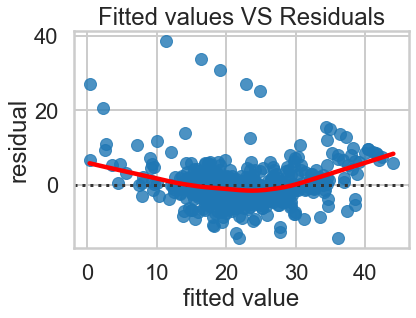

In [266]:
pred=model3.fittedvalues.copy()
sns.residplot(pred,bos.PRICE,lowess=True,line_kws={'color':'red'})
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.title('Fitted values VS Residuals')

Exercise 2:The points goes upward and away from the 45 angled line. This tells us the data is not normally distributed.

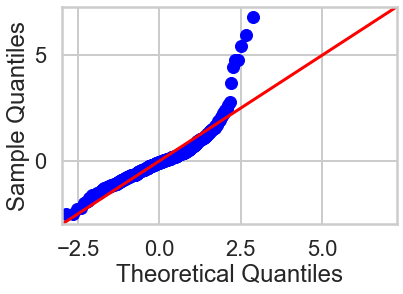

In [267]:
fig=sm.qqplot(residual,fit=True,line='45')
plt.show()

Exercise 3: The fitted values vs residuals plot conclude if there is non linear relationship in residuals whereas Q-Q plot give us information about whether the residuals are normally distributed.

Exercise 4:Most outliers exist in RM(Average number of rooms per dwelling) and CRIM(per capita crime rate by town). For RM boxplot, the average number of rooms per dwelling is 4-7.5. There some datapoint lower or higher than that interval. It might just be the preference of some family or landlord to have less or more rooms. For CRIM, the average CRIM is about 0-10. Many points are higher than the interval just simply mean some towns have more crime than others. 

In [268]:
ind_var=pd.DataFrame([bos.PTRATIO,bos.RM,bos.CRIM,bos.NOX,bos.RAD]).T
Q1=ind_var.quantile(0.25)
Q3=ind_var.quantile(0.75)
IQR=Q3-Q1
x=((ind_var < (Q1 - 1.5 * IQR)) |(ind_var> (Q3 + 1.5 * IQR)))
x

,PTRATIO,RM,CRIM,NOX,RAD
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
501,False,False,False,False,False
502,False,False,False,False,False
503,False,False,False,False,False
504,False,False,False,False,False


In [269]:
outlier_list=[]
for row in range(506):
    for column in range(5):
        if x.iloc[row, column]==True:
            outlier_list.append(row)
row_number=np.unique(outlier_list)

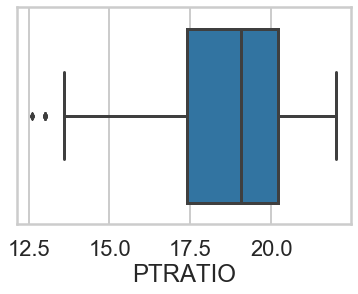

In [270]:
sns.boxplot(bos.PTRATIO)

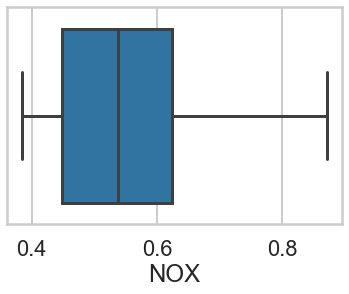

In [271]:
sns.boxplot(bos.NOX)

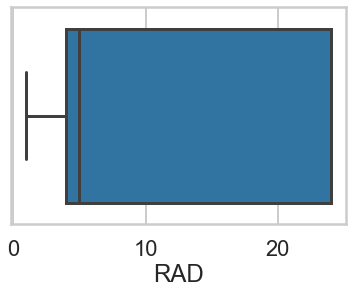

In [272]:
sns.boxplot(bos.RAD)

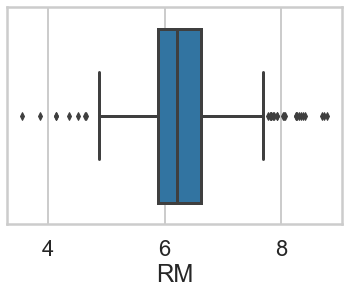

In [273]:
sns.boxplot(bos.RM)

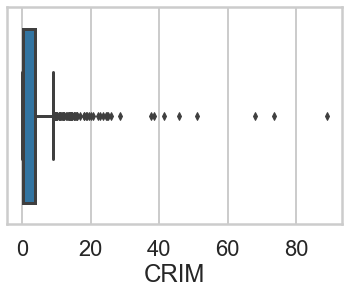

In [274]:
sns.boxplot(bos.CRIM)

Exercise 4: Row number 405 and 380 are high leverage points that have small influence. Row number 418 has high leverage and some influence. 

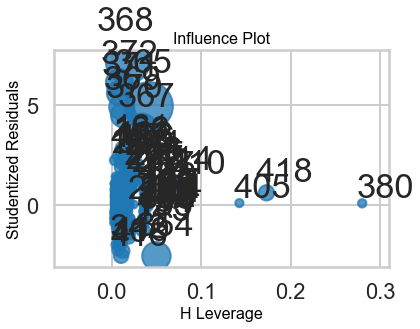

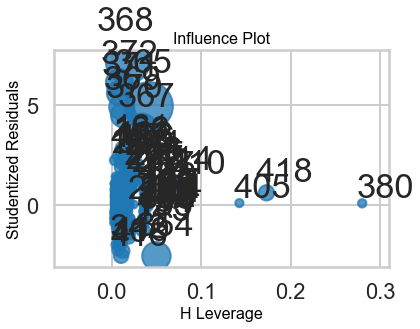

In [275]:
sm.graphics.influence_plot(model3)

In [276]:
row_number

array([ 97,  98, 162, 163, 166, 180, 186, 195, 196, 197, 198, 203, 204,
       224, 225, 226, 232, 233, 253, 257, 258, 259, 260, 261, 262, 263,
       264, 265, 266, 267, 268, 280, 283, 364, 365, 367, 371, 373, 374,
       375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388,
       392, 394, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409,
       410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 425,
       426, 427, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443,
       444, 445, 447, 448, 454, 468, 469, 477, 478, 479])

Exercise 5: The R^2 and AIC lowered for the new model. P-value for RAD lowered a lot. 

In [282]:
df=bos.drop(bos.index[row_number])
new_model=ols('PRICE ~ PTRATIO+RM+CRIM+NOX+RAD',df).fit()
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     88.60
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           1.62e-62
Time:                        15:43:51   Log-Likelihood:                -1205.2
No. Observations:                 405   AIC:                             2422.
Df Residuals:                     399   BIC:                             2446.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7590      5.130     -0.928      0.3